<a href="https://colab.research.google.com/github/kevweolomu/Data-Analysis-SQL-Project/blob/main/2020_World_Happiness_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd                                         
import numpy as np                                         

import matplotlib.pyplot as plt                             
%matplotlib inline 

import seaborn as sns                                       
sns.set(color_codes=True)
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)   
plt.rcParams['figure.facecolor'] = '#FFE5B4'

from sklearn.model_selection import train_test_split       
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer            
from collections import Counter                             

In [2]:
df = pd.read_csv("2020 World Happiness Data.csv")

In [3]:
df.shape # prints out the number of rows and columns in the dataset

(153, 10)

In [38]:
df.head()  # renders the first 5 rows of the dataset

# df.tail()  # renders the last 5 rows of the dataset

,Country_name,Regional_indicator,Ladder_score,Explained_by_GDP_per_capita,Explained_by_social_support,Explained_by_healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
pd.options.display.max_rows = 153           # prints out the maximum number of rows contained in the dataset
df

,Country_name,Regional_indicator,Ladder_score,Explained_by_GDP_per_capita,Explained_by_social_support,Explained_by_healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [5]:
print(df.columns)               # prints out the name of each column to confirm

print("")                       # makes a space between codes

df.dtypes                       # prints out the type of each column

Index(['Country_name', 'Regional_indicator', 'Ladder_score',
       'Explained_by_GDP_per_capita', 'Explained_by_social_support',
       'Explained_by_healthy_life_expectancy',
       'Explained_by_Freedom_to_make_life_choices', 'Explained_by_Generosity',
       'Explained_by_Perceptions_of_corruption', 'Dystopia '],
      dtype='object')



Country_name                                  object
Regional_indicator                            object
Ladder_score                                 float64
Explained_by_GDP_per_capita                  float64
Explained_by_social_support                  float64
Explained_by_healthy_life_expectancy         float64
Explained_by_Freedom_to_make_life_choices    float64
Explained_by_Generosity                      float64
Explained_by_Perceptions_of_corruption       float64
Dystopia                                     float64
dtype: object

In [6]:
print(df.info())            # provides a summary of the information contained in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_name                               153 non-null    object 
 1   Regional_indicator                         153 non-null    object 
 2   Ladder_score                               153 non-null    float64
 3   Explained_by_GDP_per_capita                153 non-null    float64
 4   Explained_by_social_support                153 non-null    float64
 5   Explained_by_healthy_life_expectancy       153 non-null    float64
 6   Explained_by_Freedom_to_make_life_choices  153 non-null    float64
 7   Explained_by_Generosity                    153 non-null    float64
 8   Explained_by_Perceptions_of_corruption     153 non-null    float64
 9   Dystopia                                   153 non-null    float64
dtypes: float64(8), object(2)
m

In [7]:
country_series = df["Country_name"]
country_series.describe()

count         153
unique        153
top       Finland
freq            1
Name: Country_name, dtype: object

In [8]:
global_region_series = df["Regional_indicator"]
global_region_series.describe() 

count                    153
unique                    10
top       Sub-Saharan Africa
freq                      39
Name: Regional_indicator, dtype: object

In [9]:
happiness_score_series = df["Ladder_score"]       
happiness_score_series.describe() 

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Ladder_score, dtype: float64

In [10]:
GDP_per_capita_series = df ["Explained_by_GDP_per_capita"]
GDP_per_capita_series.describe()

count    153.000000
mean       0.868771
std        0.372416
min        0.000000
25%        0.575862
50%        0.918549
75%        1.169229
max        1.536676
Name: Explained_by_GDP_per_capita, dtype: float64

In [11]:
social_support_series = df["Explained_by_social_support"]
social_support_series.describe()

count    153.000000
mean       1.155607
std        0.286866
min        0.000000
25%        0.986718
50%        1.203987
75%        1.387139
max        1.547567
Name: Explained_by_social_support, dtype: float64

In [12]:
healthy_life_expectancy_series = df["Explained_by_healthy_life_expectancy"]
healthy_life_expectancy_series.describe()

count    153.000000
mean       0.692869
std        0.254094
min        0.000000
25%        0.495443
50%        0.759818
75%        0.867249
max        1.137814
Name: Explained_by_healthy_life_expectancy, dtype: float64

In [13]:
freedom_to_make_choices_series = df["Explained_by_Freedom_to_make_life_choices"]
freedom_to_make_choices_series.describe()

count    153.000000
mean       0.463583
std        0.141172
min        0.000000
25%        0.381457
50%        0.483293
75%        0.576665
max        0.693270
Name: Explained_by_Freedom_to_make_life_choices, dtype: float64

In [14]:
generosity_series = df["Explained_by_Generosity"]
generosity_series.describe()

count    153.000000
mean       0.189375
std        0.100401
min        0.000000
25%        0.115006
50%        0.176745
75%        0.255510
max        0.569814
Name: Explained_by_Generosity, dtype: float64

In [15]:
corruption_perceptions_series = df["Explained_by_Perceptions_of_corruption"]
corruption_perceptions_series.describe()

count    153.000000
mean       0.130718
std        0.113097
min        0.000000
25%        0.055805
50%        0.098435
75%        0.163064
max        0.533162
Name: Explained_by_Perceptions_of_corruption, dtype: float64

In [16]:
dystopia_series = df["Dystopia "]
dystopia_series.describe()

count    153.000000
mean       1.972317
std        0.563638
min        0.257241
25%        1.629928
50%        2.046272
75%        2.350267
max        3.440810
Name: Dystopia , dtype: float64

### ***Relationship between variables in the 2020 World Happiness Dataset***

---



A strong relationship was observed between score and the variables GDP per capita, social support and healthlife expectancy. this means that as score increases, these variables also increase.

A moderate and weak relationship was observed between score and freedom, and score and the variables generosity and perceptions of corruption

In [31]:
print('Correlation coefficient of score and GDP per capita:', happiness_score_series.corr(GDP_per_capita_series))           
print("")

print('Correlation coefficient of score and social support:', happiness_score_series.corr(social_support_series))                          
print("")

print('Correlation coefficient of score and healthy life expectancy:', happiness_score_series.corr(healthy_life_expectancy_series))                         
print("")

print('Correlation coefficient of score and freedom to make life choices:', happiness_score_series.corr(freedom_to_make_choices_series))                        
print("")

print('Correlation coefficient of score and generosity:', happiness_score_series.corr(generosity_series))                        
print("")

print('Correlation coefficient of score and perceptions of corruption:', happiness_score_series.corr(corruption_perceptions_series))             
print("")  

print('Correlation coefficient of score and dystopia:', happiness_score_series.corr(dystopia_series))

Correlation coefficient of score and GDP per capita: 0.7753743955405614

Correlation coefficient of score and social support: 0.765000753790511

Correlation coefficient of score and healthy life expectancy: 0.7703162873347794

Correlation coefficient of score and freedom to make life choices: 0.590596793516565

Correlation coefficient of score and generosity: 0.06904312848601242

Correlation coefficient of score and perceptions of corruption: 0.4183050827015968

Correlation coefficient of score and dystopia: 0.4802789425428382


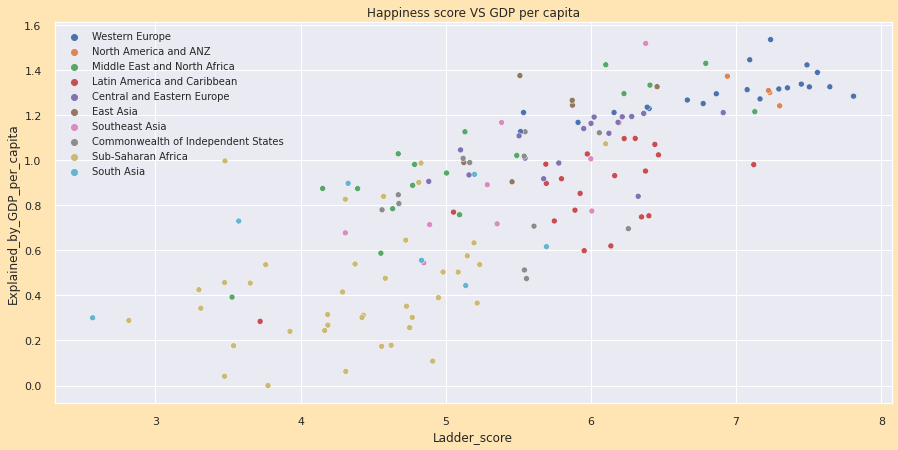

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


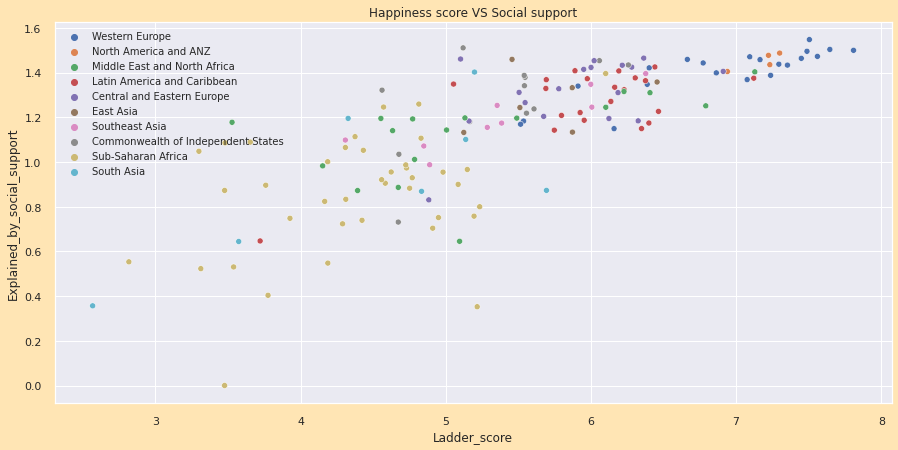

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


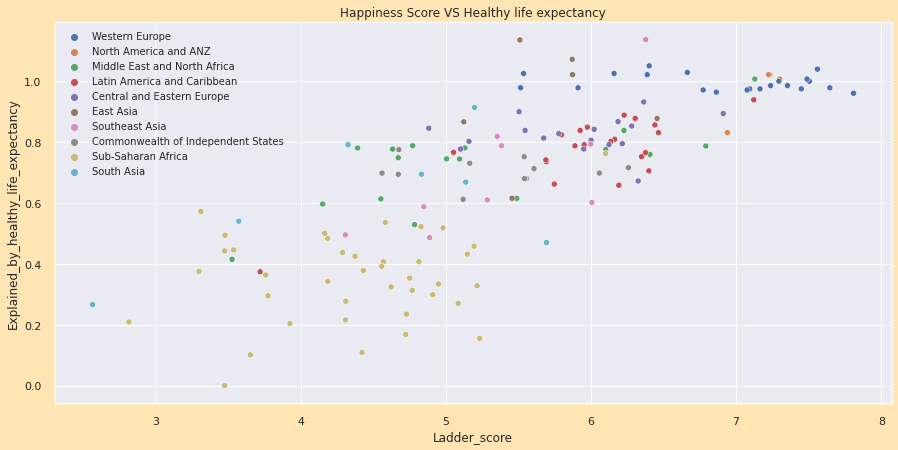

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


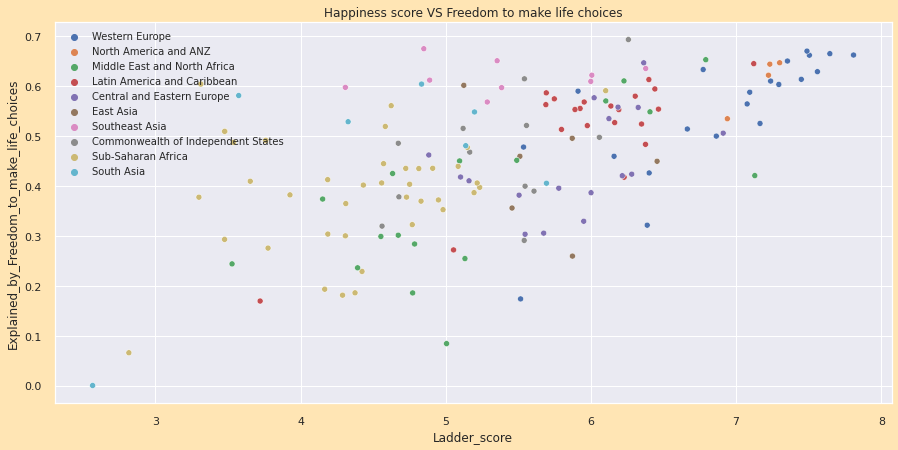

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


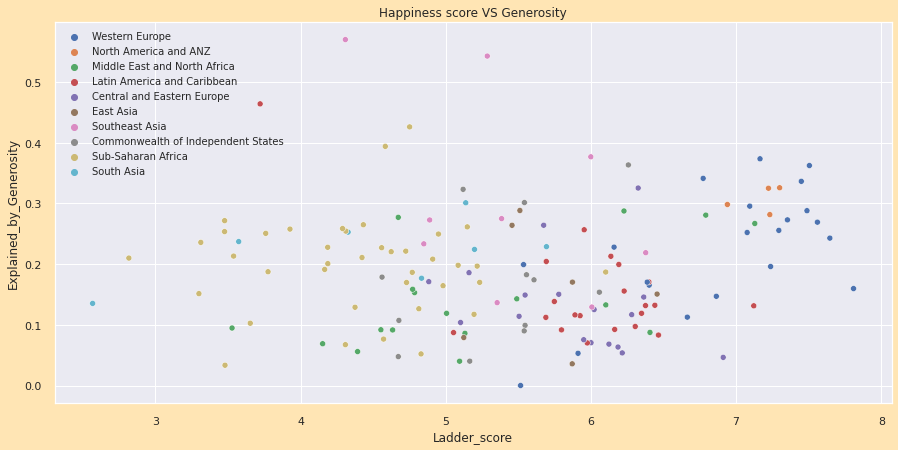

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


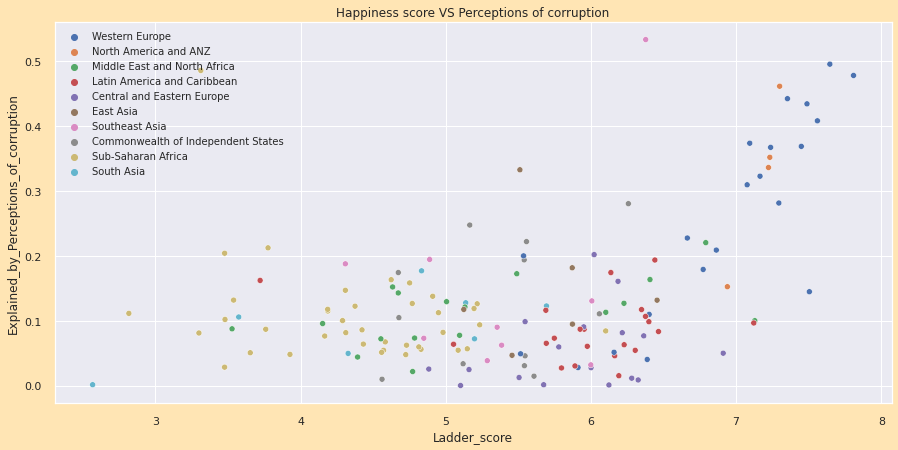

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


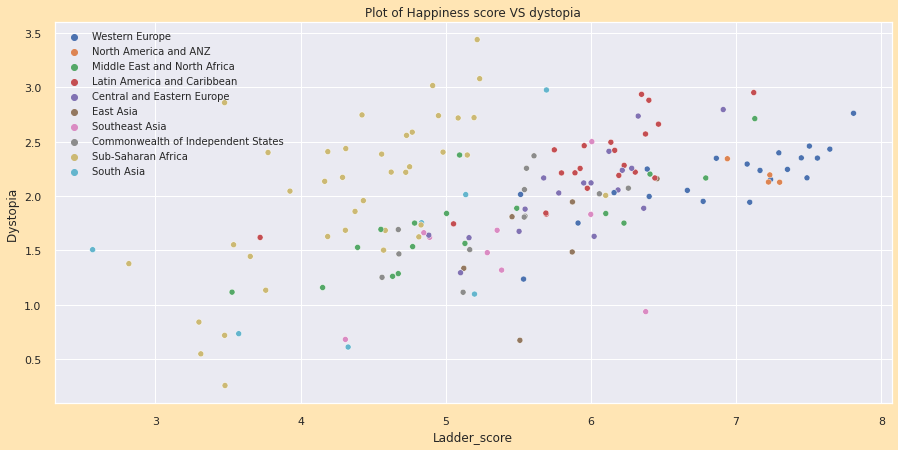

In [54]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happiness_score_series, y = GDP_per_capita_series, hue = global_region_series)
plt.legend(loc = 'upper left', fontsize = '10')
plt.title('Happiness score VS GDP per capita')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, social_support_series, hue = global_region_series) 
plt.legend(loc = 'upper left', fontsize = '10') 
plt.title('Happiness score VS Social support')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, healthy_life_expectancy_series, hue = global_region_series)
plt.legend(loc = 'upper left', fontsize = '10')  
plt.title('Happiness Score VS Healthy life expectancy')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, freedom_to_make_choices_series, hue = global_region_series) 
plt.legend(loc = 'upper left', fontsize = '10') 
plt.title('Happiness score VS Freedom to make life choices')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, generosity_series, hue = global_region_series)  
plt.legend(loc = 'upper left', fontsize = '10') 
plt.title('Happiness score VS Generosity')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, corruption_perceptions_series, hue = global_region_series)  
plt.legend(loc = 'upper left', fontsize = '10') 
plt.title('Happiness score VS Perceptions of corruption')
plt.show()

print("")
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(happiness_score_series, dystopia_series, hue = global_region_series)  
plt.legend(loc = 'upper left', fontsize = '10') 
plt.title('Plot of Happiness score VS dystopia')
plt.show()

In [ ]:
print('Correlation coefficient of GDP per capita and social support:', GDP_per_capita_series.corr(social_support_series))                          
print("")

print('Correlation coefficient of GDP per capita and healthy life expectancy:', GDP_per_capita_series.corr(healthy_life_expectancy_series))                         
print("")

print('Correlation coefficient of GDP per capita and freedom to make life choices:', GDP_per_capita_series.corr(freedom_to_make_choices_series))                        
print("")

print('Correlation coefficient of GDP per capita and generosity:', GDP_per_capita_series.corr(generosity_series))                        
print("")

print('Correlation coefficient of GDP per capita and perceptions of corruption:', GDP_per_capita_series.corr(corruption_perceptions_series))
print("")

print('Correlation coefficient of GDP per capita and dystopia:', GDP_per_capita_series.corr(dystopia_series))

In [ ]:
print('Correlation coefficient of social support and healthy life expectancy:', social_support_series.corr(healthy_life_expectancy_series))                         
print("")
print('Correlation coefficient of social support and freedom to make life choices:', social_support_series.corr(freedom_to_make_choices_series))                        
print("")
print('Correlation coefficient of social support and generosity:', social_support_series.corr(generosity_series))                        
print("")
print('Correlation coefficient of social support and perceptions of corruption:', social_support_series.corr(corruption_perceptions_series))

In [ ]:
print('Correlation coefficient of healthy life expectancy and freedom to make life choices:', healthy_life_expectancy_series.corr(freedom_to_make_choices_series))                        
print("")
print('Correlation coefficient of healthy life expectancy and generosity:', healthy_life_expectancy_series.corr(generosity_series))                        
print("")
print('Correlation coefficient of healthy life expectancy and perceptions of corruption:', healthy_life_expectancy_series.corr(corruption_perceptions_series))

In [25]:
print('Correlation coefficient of freedom to make life choices and generosity:', freedom_to_make_choices_series.corr(generosity_series))                        
print("")
print('Correlation coefficient of freedom to make life choices and perceptions of corruption:', freedom_to_make_choices_series.corr(corruption_perceptions_series))

Correlation coefficient of freedom to make life choices and generosity: 0.25372113393523754

Correlation coefficient of freedom to make life choices and perceptions of corruption: 0.4201445046903958


In [27]:
print('Correlation coefficient of generosity and perceptions of corruption:', generosity_series.corr(corruption_perceptions_series))

Correlation coefficient of generosity and perceptions of corruption: 0.278480216773167


In [64]:
GDP_region = df.groupby('Regional_indicator')['Explained_by_GDP_per_capita'].sum()  # to sum of gdp per capital of each region 
GDP_region

Regional_indicator
Central and Eastern Europe            18.351959
Commonwealth of Independent States    10.096205
East Asia                              7.111648
Latin America and Caribbean           18.291823
Middle East and North Africa          16.971211
North America and ANZ                  5.228349
South Asia                             4.484139
Southeast Asia                         8.017385
Sub-Saharan Africa                    17.060482
Western Europe                        27.308783
Name: Explained_by_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

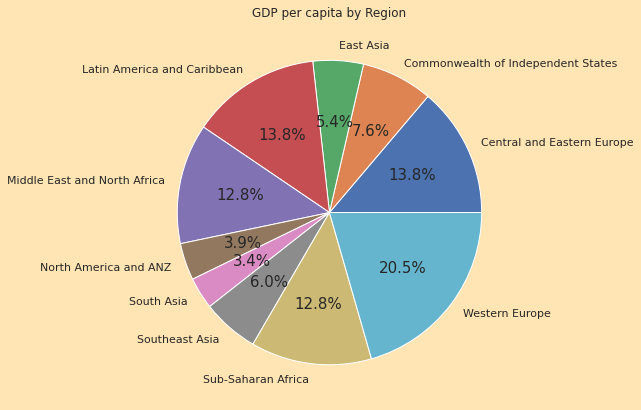

In [65]:
GDP_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP per capita by Region')
plt.ylabel('')

In [67]:
total_country_per_region = df.groupby('Regional_indicator')[['Country_name']].count()
total_country_per_region

,Country_name
Regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,21
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,39


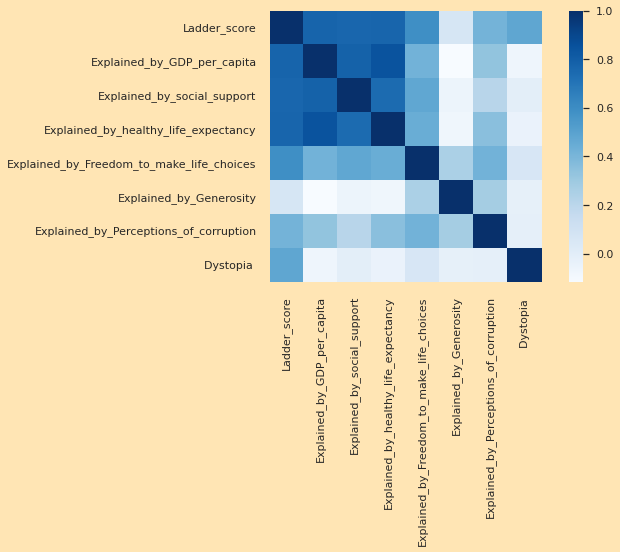

In [72]:
# plotting a correlation map

cor = df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap="Blues", square=True, ax=ax)
